<a href="https://colab.research.google.com/github/AmirEfi/Graph-Simulation/blob/master/Simulation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import networkx as nx
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

#Q1

In [ ]:
# Q1-Part1: Algebraic Connectivity
nodes = 100
graph_watts = [nx.watts_strogatz_graph(nodes, 5, 0.3)]
graph_erdos = [nx.erdos_renyi_graph(nodes, 0.5)]
graph_barabasi = [nx.barabasi_albert_graph(nodes, 3)]

alg_connectivity_watts = nx.algebraic_connectivity(graph_watts[0])
alg_connectivity_erdos = nx.algebraic_connectivity(graph_erdos[0])
alg_connectivity_barabasi = nx.algebraic_connectivity(graph_barabasi[0])
print("Algebraic Connectivity of graphs:")
print('Watts-Strogatz: {0} . '.format(alg_connectivity_watts))
print('Erdos-Renyi: {0} . '.format(alg_connectivity_erdos))
print('Barabasi-Albert: {0} .'.format(alg_connectivity_barabasi))

Algebraic Connectivity of graphs:
Watts-Strogatz: 0.29087130811904066 . 
Erdos-Renyi: 36.53595830089275 . 
Barabasi-Albert: 1.224640138085229 .


In [ ]:
# Q1-Part2: Spectral Gap
lap_watts = nx.normalized_laplacian_matrix(graph_watts[0])
e_watts = np.linalg.eigvals(lap_watts.toarray())   # compute eigenvalues of matrix.
spect_watts = e_watts[-1] - e_watts[-2]            # compute delta Y

lap_erdos = nx.normalized_laplacian_matrix(graph_erdos[0])
e_erdos = np.linalg.eigvals(lap_erdos.toarray())   # compute eigenvalues of matrix.
spect_erdos = e_erdos[-1] - e_erdos[-2]            # compute delta Y

lap_barabasi = nx.normalized_laplacian_matrix(graph_barabasi[0])
e_barabasi = np.linalg.eigvals(lap_barabasi.toarray())   # compute eigenvalues of matrix.
spect_barabasi = e_barabasi[-1] - e_barabasi[-2]         # compute delta Y

print("Spectral Gap of graphs:")
print('Watts-Strogatz: {0} .'.format(spect_watts))
print('Erdos-Renyi: {0} .'.format(spect_erdos))
print('Barabasi-Albert: {0} .'.format(spect_barabasi))

Spectral Gap of graphs:
Watts-Strogatz: 0.06712798996109215 .
Erdos-Renyi: 0.04775263872245061 .
Barabasi-Albert: 0.06290905556235682 .


In [ ]:
# Q1-Part3: Natural Connectivity
sum_natu = 0
for i in range(len(e_watts)):
  sum_natu += (math.exp(e_watts[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_watts = math.log(sum_natu)

sum_natu = 0
for i in range(len(e_erdos)):
  sum_natu += (math.exp(e_erdos[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_erdos = math.log(sum_natu)

sum_natu = 0
for i in range(len(e_barabasi)):
  sum_natu += (math.exp(e_barabasi[i]) / nodes)
sum_natu = math.floor(sum_natu)
natu_barabasi = math.log(sum_natu)


print("Natural Connectivity of graphs:")
print('Watts-Strogatz: {0} .'.format(natu_watts))
print('Erdos-Renyi: {0} .'.format(natu_erdos))
print('Barabasi-Albert: {0} .'.format(natu_barabasi))

Natural Connectivity of graphs:
Watts-Strogatz: 1.0986122886681098 .
Erdos-Renyi: 0.6931471805599453 .
Barabasi-Albert: 0.6931471805599453 .


In [ ]:
# Q1-Part4: Energy
sum_watts = 0
for i in range(len(e_watts)):
  sum_watts += abs(e_watts[i])

sum_erdos = 0
for i in range(len(e_erdos)):
  sum_erdos += abs(e_erdos[i])

sum_barabasi = 0
for i in range(len(e_barabasi)):
  sum_barabasi += abs(e_barabasi[i])

print("Energy of graphs:")
print('Watts-Strogatz: {0} .'.format(sum_watts))
print('Erdos-Renyi: {0} .'.format(sum_erdos))
print('Barabasi-Albert: {0} .'.format(sum_barabasi))

Energy of graphs:
Watts-Strogatz: 100.00000000000003 .
Erdos-Renyi: 100.00000000000003 .
Barabasi-Albert: 100.00000000000003 .


In [ ]:
#Q1-Part5: Laplacian Energy
lapSpec_watts = nx.laplacian_spectrum(graph_watts[0])
edges_watts = graph_watts[0].number_of_edges()
list_yi_watts = []
for i in range(len(lapSpec_watts)):
  yi_watts = lapSpec_watts[i] - (2*edges_watts/nodes)
  list_yi_watts.append(yi_watts)
sum_yi_watts = 0
for j in range(len(list_yi_watts)):
  sum_yi_watts += abs(list_yi_watts[j])


lapSpec_erdos = nx.laplacian_spectrum(graph_erdos[0])
edges_erdos = graph_erdos[0].number_of_edges()
list_yi_erdos = []
for i in range(len(lapSpec_erdos)):
  yi_erdos = lapSpec_erdos[i] - (2*edges_erdos/nodes)
  list_yi_erdos.append(yi_erdos)
sum_yi_erdos = 0
for j in range(len(list_yi_erdos)):
  sum_yi_erdos += abs(list_yi_erdos[j])


lapSpec_barabasi = nx.laplacian_spectrum(graph_barabasi[0])
edges_barabasi = graph_barabasi[0].number_of_edges()
list_yi_barabasi = []
for i in range(len(lapSpec_barabasi)):
  yi_barabasi = lapSpec_barabasi[i] - (2*edges_barabasi/nodes)
  list_yi_barabasi.append(yi_barabasi)
sum_yi_barabasi = 0
for j in range(len(list_yi_barabasi)):
  sum_yi_barabasi += abs(list_yi_barabasi[j])

print("Laplacian Energy of graphs:")
print('Watts-Strogatz: {0} .'.format(sum_yi_watts))
print('Erdos-Renyi: {0} .'.format(sum_yi_erdos))
print('Barabasi-Albert: {0} .'.format(sum_yi_barabasi))

Laplacian Energy of graphs:
Watts-Strogatz: 189.67440966900037 .
Erdos-Renyi: 590.3973842786105 .
Barabasi-Albert: 362.3417473717096 .


#Q2

n1 = 13
n2 = 2
d1 = 2
d2 = 13


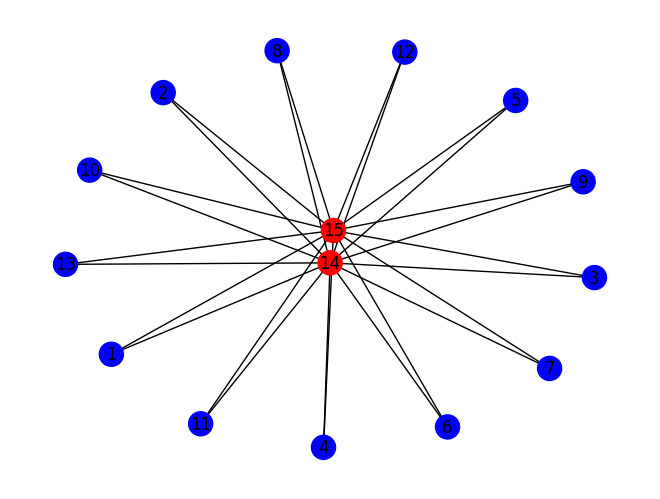

In [ ]:
# Q2-Part1: draw RSRBG graph
def isMultiple(i, nd1):
  return nd1 % i == 0

d1 = random.randrange(2, 10)
n1 = random.randrange(10, 30)
n2 = 0
d2 = 0
nd1 = n1 * d1

divisible = [i for i in range(2, nd1) if isMultiple(i, nd1)]

while n2 < d1:
  n2 = random.choice(divisible)
d2 = int(nd1 / n2)

nodes_1 = []
for i in range(1, n1 + 1):
  for j in range(d1):
    nodes_1.append(i)

nodes_2 = []
for i in range(n1 + 1, n1 + n2 + 1):
  for j in range(d2):
    nodes_2.append(i)

print("n1 =", n1)
print("n2 =", n2)
print("d1 =", d1)
print("d2 =", d2)
# print("nodes of 1:")
# print(nodes_1)

# print("nodes of 2:")
# print(nodes_2)

# draw edges
nodes_visit = set()
len_nodes_1 = len(nodes_1)
len_nodes_2 = len(nodes_2)
RSRBG = nx.Graph()

while len_nodes_1 > 0:
    index1 = random.randrange(len_nodes_1)
    index2 = random.randrange(len_nodes_2)
    del1 = nodes_1[index1 - 1]
    del2 = nodes_2[index2 - 1]

    if del1 not in nodes_visit:
      nodes_visit.add(del1)
      RSRBG.add_node(del1)
    if del2 not in nodes_visit:
      nodes_visit.add(del2)
      RSRBG.add_node(del2)

    if RSRBG.has_edge(del1, del2) is False:
      RSRBG.add_edge(del1, del2)
      nodes_1.pop(index1 - 1)
      nodes_2.pop(index2 - 1)

    len_nodes_1 = len(nodes_1)
    len_nodes_2 = len(nodes_2)


color_map = ['red' if node >= n1 + 1 else 'blue' for node in RSRBG]

nx.draw(RSRBG, node_color=color_map, with_labels=True)

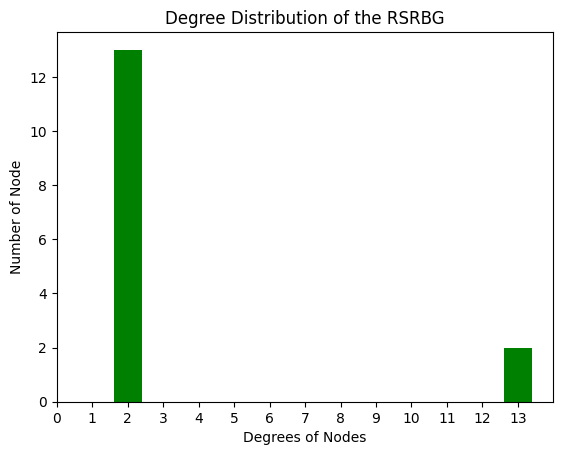

In [ ]:
# Q2-Part2: Degree Distribution
degrees = [RSRBG.degree(n) for n in RSRBG.nodes()]
labels, counts = np.unique(degrees, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the RSRBG")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(0,max(d1,d2) + 1))
plt.show()

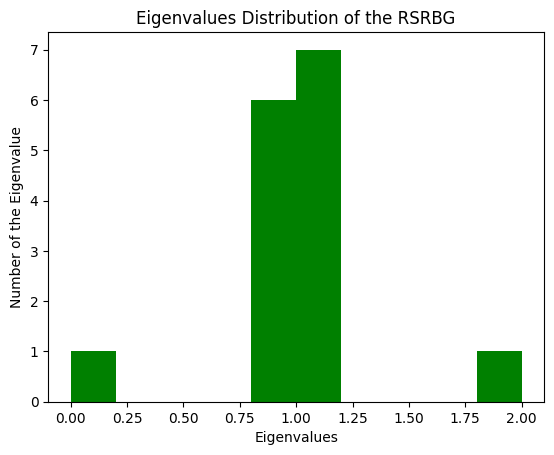

In [ ]:
# Q2-Part3: Eigenvalues Distribution
lap_RSRBG = nx.normalized_laplacian_matrix(RSRBG)
e_RSRBG = np.linalg.eigvals(lap_RSRBG.toarray())   # compute eigenvalues of matrix.
plt.hist(e_RSRBG, color='green')
plt.title("Eigenvalues Distribution of the RSRBG")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [ ]:
# Q2-Part4: Spectral Gap, Algebraic Connectivity, Natural Connectivity, Symmetry Ratio, Energy, Laplacian Energy
spect_RSRBG = e_RSRBG[-1] - e_RSRBG[-2]
print('Spectral Gap: {0} .'.format(spect_RSRBG))

alg_connectivity_RSRBG = nx.algebraic_connectivity(RSRBG)
print('Algebraic Connectivity: {0} .'.format(alg_connectivity_RSRBG))

sum_natu = 0
for i in range(len(e_RSRBG)):
  sum_natu += (math.exp(e_RSRBG[i]) / (n1+n2))
sum_natu = math.floor(sum_natu)
natu_RSRBG = math.log(sum_natu)
print('Natural Connectivity: {0} .'.format(natu_RSRBG))

e_RSRBG_remDuplic = []
for i in e_RSRBG:
  if i not in e_RSRBG_remDuplic:
    e_RSRBG_remDuplic.append(i)
dia_RSRBG = nx.diameter(RSRBG)
sym_rat_RSRBG = len(e_RSRBG_remDuplic) / (dia_RSRBG + 1)
print('Symmetry Ratio: {0} .'.format(sym_rat_RSRBG))

sum_RSRBG = 0
for i in range(len(e_RSRBG)):
  sum_RSRBG += abs(e_RSRBG[i])
print('Energy: {0} .'.format(sum_RSRBG))

lapSpec_RSRBG = nx.laplacian_spectrum(RSRBG)
edges_RSRBG = RSRBG.number_of_edges()
list_yi_RSRBG = []
for i in range(len(lapSpec_RSRBG)):
  yi_RSRBG = lapSpec_RSRBG[i] - (2*edges_RSRBG/(n1+n2))
  list_yi_RSRBG.append(yi_RSRBG)
sum_yi_RSRBG = 0
for j in range(len(list_yi_RSRBG)):
  sum_yi_RSRBG += abs(list_yi_RSRBG[j])
print('Laplacian Energy: {0} .'.format(sum_yi_RSRBG))


Spectral Gap: 3.3306690738754696e-16 .
Algebraic Connectivity: 1.9999999999999998 .
Natural Connectivity: 0.6931471805599453 .
Symmetry Ratio: 2.6666666666666665 .
Energy: 14.999999999999998 .
Laplacian Energy: 42.13333333333334 .


#Q3

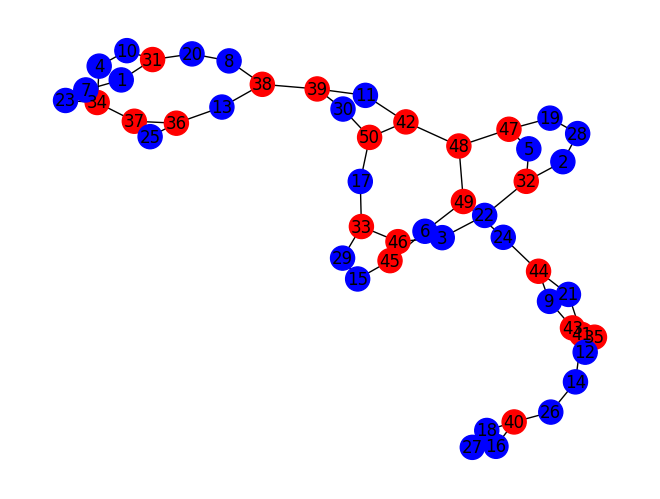

In [ ]:
# Q3-Part1: draw RSRG graph
d1_q3 = 2
d2_q3 = 3
p_q3 = 0.4
n_q3 = 50
n1_q3 = math.floor(n_q3 * (1 - p_q3))
n2_q3 = n_q3 - n1_q3

nodes_q3 = list()

for i in range(1, n1_q3 + 1):
  for j in range(d1_q3):
    nodes_q3.append(i)

for i in range(n1_q3 + 1, n1_q3 + n2_q3 + 1):
  for j in range(d2_q3):
    nodes_q3.append(i)

nodes_visit_q3 = set()
len_nodes_q3 = len(nodes_q3)
RSRG = nx.Graph()

while len_nodes_q3 > 0:
    index1 = random.randrange(len_nodes_q3)
    index2 = random.randrange(len_nodes_q3)
    if index1 == index2:
      continue

    del1 = nodes_q3[index1 - 1]
    del2 = nodes_q3[index2 - 1]

    if del1 not in nodes_visit_q3:
      nodes_visit_q3.add(del1)
      RSRG.add_node(del1)
    if del2 not in nodes_visit_q3:
      nodes_visit_q3.add(del2)
      RSRG.add_node(del2)

    if RSRG.has_edge(del1, del2) is False:
      RSRG.add_edge(del1, del2)
      if index2 > index1:
        nodes_q3.pop(index2 - 1)
        nodes_q3.pop(index1 - 1)
      else:
        nodes_q3.pop(index1 - 1)
        nodes_q3.pop(index2 - 1)

    len_nodes_q3 = len(nodes_q3)


color_map = ['red' if node >= n1_q3 + 1 else 'blue' for node in RSRG]

nx.draw(RSRG, node_color=color_map, with_labels=True)




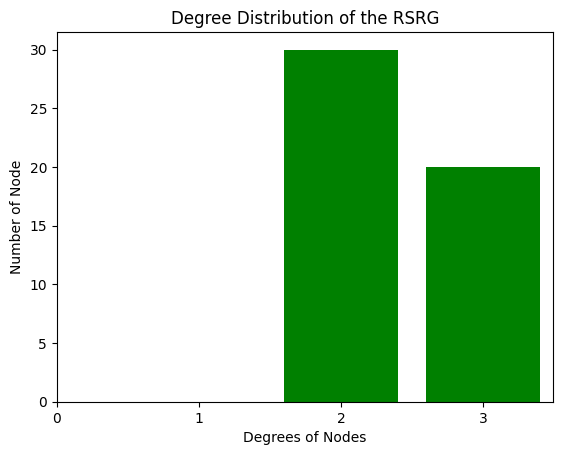

In [ ]:
# Q3-Part2: Degree Distribution
degrees_q3 = [RSRG.degree(n) for n in RSRG.nodes()]
labels, counts = np.unique(degrees_q3, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the RSRG")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(0,max(d1_q3,d2_q3) + 1))
plt.show()



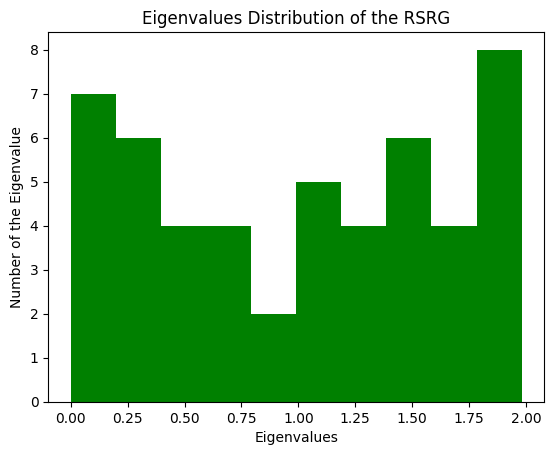

In [ ]:
# Q3-Part3: Eigenvalues Distribution
lap_RSRG = nx.normalized_laplacian_matrix(RSRG)
e_RSRG = np.linalg.eigvals(lap_RSRG.toarray())   # compute eigenvalues of matrix.
plt.hist(e_RSRG, color='green')
plt.title("Eigenvalues Distribution of the RSRG")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [ ]:
# Q3-Part4: Spectral Gap, Algebraic Connectivity, Natural Connectivity, Symmetry Ratio, Energy, Laplacian Energy
spect_RSRG = e_RSRG[-1] - e_RSRG[-2]
print('Spectral Gap: {0} .'.format(spect_RSRG))

alg_connectivity_RSRG = nx.algebraic_connectivity(RSRG)
print('Algebraic Connectivity: {0} .'.format(alg_connectivity_RSRG))

sum_natu = 0
for i in range(len(e_RSRG)):
  sum_natu += (math.exp(e_RSRG[i]) / (n1_q3+n2_q3))
sum_natu = math.floor(sum_natu)
natu_RSRG = math.log(sum_natu)
print('Natural Connectivity: {0} .'.format(natu_RSRG))

e_RSRG_remDuplic = []
for i in e_RSRG:
  if i not in e_RSRG_remDuplic:
    e_RSRG_remDuplic.append(i)
dia_RSRG = nx.diameter(RSRG)
sym_rat_RSRG = len(e_RSRG_remDuplic) / (dia_RSRG + 1)
print('Symmetry Ratio: {0} .'.format(sym_rat_RSRG))

sum_RSRG = 0
for i in range(len(e_RSRG)):
  sum_RSRG += abs(e_RSRG[i])
print('Energy: {0} .'.format(sum_RSRG))

lapSpec_RSRG = nx.laplacian_spectrum(RSRG)
edges_RSRG = RSRG.number_of_edges()
list_yi_RSRG = []
for i in range(len(lapSpec_RSRG)):
  yi_RSRG = lapSpec_RSRG[i] - (2*edges_RSRG/(n1_q3+n2_q3))
  list_yi_RSRG.append(yi_RSRG)
sum_yi_RSRG = 0
for j in range(len(list_yi_RSRG)):
  sum_yi_RSRG += abs(list_yi_RSRG[j])
print('Laplacian Energy: {0} .'.format(sum_yi_RSRG))

Spectral Gap: 0.0 .
Algebraic Connectivity: 0.01820027834415548 .
Natural Connectivity: 1.0986122886681098 .
Symmetry Ratio: 2.45 .
Energy: 50.00000000000001 .
Laplacian Energy: 71.222903374458 .


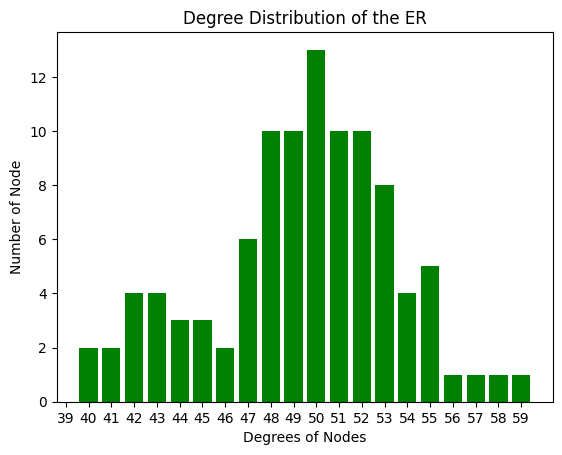

In [ ]:
# Q3-Part5: ER Degree Distribution
degrees_ER = [graph_erdos[0].degree(n) for n in graph_erdos[0].nodes()]
labels, counts = np.unique(degrees_ER, return_counts=True)
plt.bar(labels, counts, color='green', align='center')
plt.title("Degree Distribution of the ER")
plt.xlabel("Degrees of Nodes")
plt.ylabel("Number of Node")
plt.xticks(range(min(degrees_ER) - 1, max(degrees_ER) + 1))
plt.show()

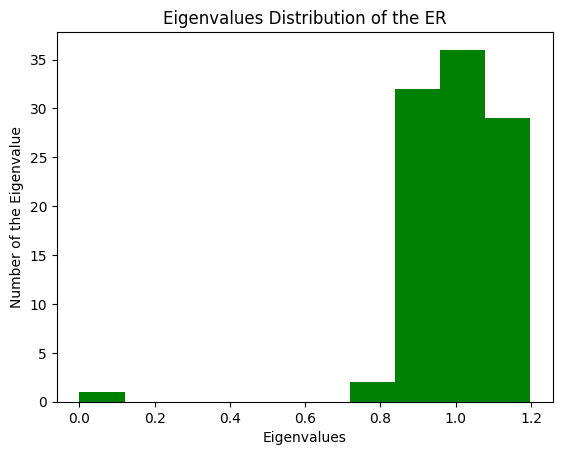

In [ ]:
# Q3-Part6: ER Eigenvalues Distribution
plt.hist(e_erdos, color='green')
plt.title("Eigenvalues Distribution of the ER")
plt.xlabel("Eigenvalues")
plt.ylabel("Number of the Eigenvalue")
plt.show()

In [5]:
# Q3-Part7: compute Algebraic Connectivity Distribution
d1_q3 = 2
d2_q3 = 3
n_q3 = 500
number_of_simu = 1000
alg_simu = list()
given_p = [0.125, 0.25, 0.5, 0.75, 1]

for z in range(number_of_simu):
  p_q3 = random.choice(given_p)
  n1_q3 = math.floor(n_q3 * (1 - p_q3))
  n2_q3 = n_q3 - n1_q3

  nodes_q3 = list()

  for i in range(1, n1_q3 + 1):
    for j in range(d1_q3):
      nodes_q3.append(i)

  for i in range(n1_q3 + 1, n1_q3 + n2_q3 + 1):
    for j in range(d2_q3):
      nodes_q3.append(i)

  nodes_visit_q3 = set()
  len_nodes_q3 = len(nodes_q3)
  RSRG_alg = nx.Graph()

  while len_nodes_q3 > 0:
      index1 = random.randrange(len_nodes_q3)
      index2 = random.randrange(len_nodes_q3)
      if index1 == index2:
        continue

      if len(nodes_visit_q3) == 500:
         break

      del1 = nodes_q3[index1 - 1]
      del2 = nodes_q3[index2 - 1]

      if del1 not in nodes_visit_q3:
        nodes_visit_q3.add(del1)
        RSRG_alg.add_node(del1)
      if del2 not in nodes_visit_q3:
        nodes_visit_q3.add(del2)
        RSRG_alg.add_node(del2)

      if RSRG_alg.has_edge(del1, del2) is False:
        RSRG_alg.add_edge(del1, del2)
        if index2 > index1:
          nodes_q3.pop(index2 - 1)
          nodes_q3.pop(index1 - 1)
        else:
          nodes_q3.pop(index1 - 1)
          nodes_q3.pop(index2 - 1)

      len_nodes_q3 = len(nodes_q3)

  alg_simu.append(nx.algebraic_connectivity(RSRG_alg))



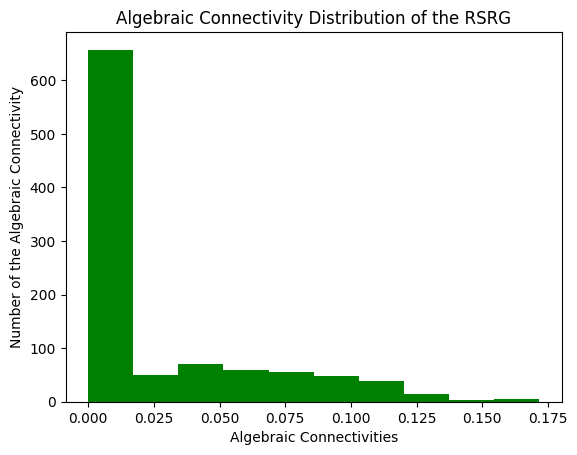

In [7]:
# Q3-Part7: draw Algebraic Connectivity Distribution
plt.hist(alg_simu, color='green')
plt.title("Algebraic Connectivity Distribution of the RSRG")
plt.xlabel("Algebraic Connectivities")
plt.ylabel("Number of the Algebraic Connectivity")
plt.show()

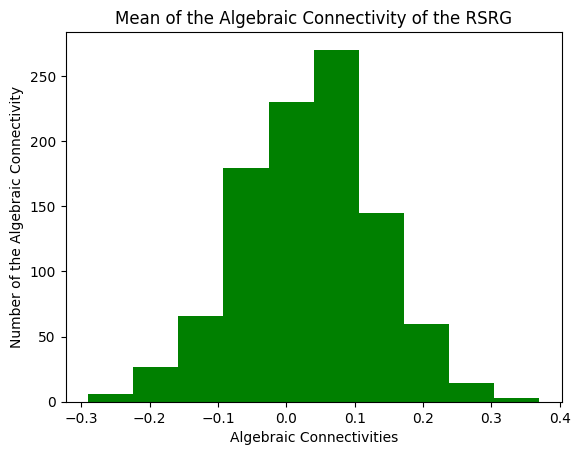

In [10]:
# Q3-Part8: Mean of the Algebraic Connectivity using Monte-Carlo simulation
avg = sum(alg_simu) / len(alg_simu)
num_reps = 1000
std_dev = 0.1
pdf_alg = np.random.normal(avg, std_dev, num_reps).round(2)
plt.hist(pdf_alg, color='green')
plt.title("Mean of the Algebraic Connectivity of the RSRG")
plt.xlabel("Algebraic Connectivities")
plt.ylabel("Number of the Algebraic Connectivity")
plt.show()

#Q4

#Q5

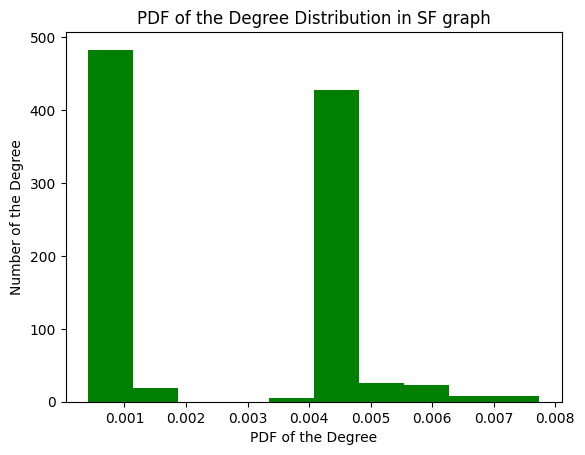

In [64]:
# Q5-Part1: PDF in Scale-Free graph
def rem_dup(degrees):
  remDeg = list()
  for i in degrees:
    if i not in remDeg:
      remDeg.append(i)
  return remDeg

nodes_q5 = 500
k = 4
gamma = [2,3]
pdf_all = list()
for i in range(1000):
  pdf_deg = list()
  SF_graph = nx.barabasi_albert_graph(nodes_q5, k)
  degrees = [SF_graph.degree(n) for n in SF_graph.nodes()]
  remDupDeg = rem_dup(degrees)
  tmp_ga = random.choice(gamma)
  for j in range(len(remDupDeg)):
    mean_deg = math.pow((remDupDeg[j]+2), -tmp_ga)
    pdf_deg.append(mean_deg)

  pdf_all.append(sum(pdf_deg)/len(pdf_deg))

plt.hist(pdf_all, color='green')
plt.title("PDF of the Degree Distribution in SF graph")
plt.xlabel("PDF of the Degree")
plt.ylabel("Number of the Degree")
plt.show()

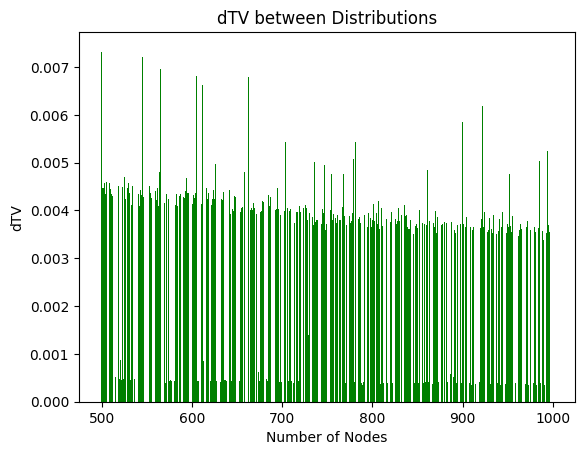

In [66]:
# Q5-Part2: dTV between PDFs
pdf_all = list()
for i in range(1000):
  pdf_deg = list()
  nodes_q5 = random.randrange(500,1000)
  SF_graph = nx.barabasi_albert_graph(nodes_q5, k)
  degrees = [SF_graph.degree(n) for n in SF_graph.nodes()]
  remDupDeg = rem_dup(degrees)
  tmp_ga = random.choice(gamma)
  for j in range(len(remDupDeg)):
    mean_deg = math.pow((remDupDeg[j]+2), -tmp_ga)
    pdf_deg.append(mean_deg)

  pdf_all.append([sum(pdf_deg)/len(pdf_deg), nodes_q5])

df = pd.DataFrame(pdf_all, columns=['PDF', 'Nodes'])
plt.bar(df["Nodes"], df["PDF"], color='green')
plt.title("dTV between Distributions")
plt.xlabel("Number of Nodes")
plt.ylabel("dTV")
plt.show()